In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

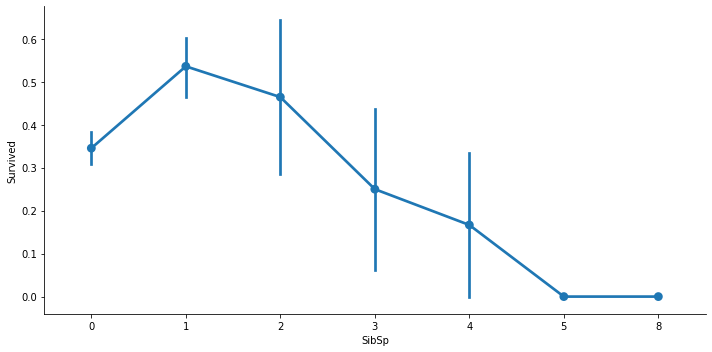

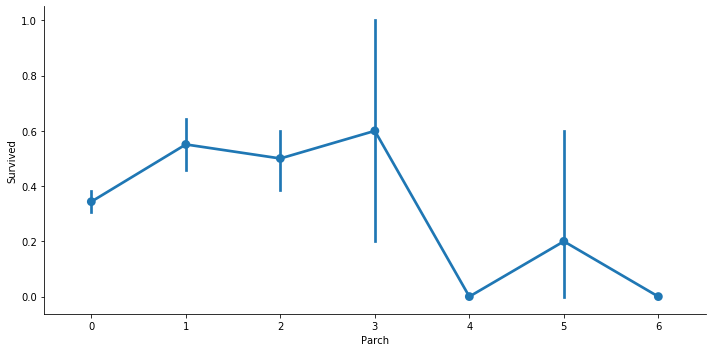

In [9]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [302]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [303]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [304]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


In [305]:
titanic.to_csv('titanic_cleaned.csv', index=False)

In [306]:
titanic= pd.read_csv('titanic_cleaned.csv')

In [307]:
titanic['Cabin_ind']= np.where(titanic['Cabin'].isnull(),0,1)

In [308]:
gender_num ={'male':0,'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [309]:
titanic.drop(['Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)

In [310]:
titanic.to_csv('titanic_cleaned.csv',index=False)

In [311]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [312]:
titanic.describe()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.904602,0.228956
std,0.486592,0.836071,0.477990,13.002015,49.693429,1.613459,0.420397
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,10.000000,1.000000


In [313]:
features = titanic.drop('Survived',axis=1)
labels = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [314]:
for dataset in [y_train,y_test,y_val]:
    print(round((len(dataset) / len(labels)), 2))

0.6
0.2
0.2


In [315]:
X_train.to_csv('train_features.csv',index=False)
X_val.to_csv('val_features.csv',index=False)
X_test.to_csv('test_features.csv',index=False)

y_train.to_csv('train_labels.csv',index=False)
y_val.to_csv('val_labels.csv',index=False)
y_test.to_csv('test_labels.csv',index=False)

In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv',header=None)

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv',header=None)

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv',header=None)


In [317]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [318]:
rf = RandomForestClassifier()

scores = cross_val_score(rf,tr_features,tr_labels.values.ravel(),cv=5)

In [319]:
scores

array([0.84259259, 0.81308411, 0.80373832, 0.80188679, 0.82075472])

In [320]:
parameters = {
    'n_estimators' : [5,50,100],
    'max_depth' : [2,10,20,None]
}
cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.794 (+/-0.091) for {'max_depth': 2, 'n_estimators': 5}
0.805 (+/-0.118) for {'max_depth': 2, 'n_estimators': 50}
0.79 (+/-0.114) for {'max_depth': 2, 'n_estimators': 100}
0.809 (+/-0.061) for {'max_depth': 10, 'n_estimators': 5}
0.82 (+/-0.054) for {'max_depth': 10, 'n_estimators': 50}
0.831 (+/-0.055) for {'max_depth': 10, 'n_estimators': 100}
0.794 (+/-0.044) for {'max_depth': 20, 'n_estimators': 5}
0.813 (+/-0.031) for {'max_depth': 20, 'n_estimators': 50}
0.815 (+/-0.035) for {'max_depth': 20, 'n_estimators': 100}
0.796 (+/-0.04) for {'max_depth': None, 'n_estimators': 5}
0.801 (+/-0.037) for {'max_depth': None, 'n_estimators': 50}
0.811 (+/-0.053) for {'max_depth': None, 'n_estimators': 100}


C:\Users\VIVEK\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [321]:
rf1 = RandomForestClassifier(n_estimators=50,max_depth=10)
rf1.fit(tr_features,tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators= 10 ,max_depth = 10)
rf2.fit(tr_features,tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators = 100 , max_depth = 10)
rf3.fit(tr_features,tr_labels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [322]:
for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels,y_pred),3)
    precision = round(precision_score(val_labels,y_pred),3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.827 / P: 0.846 / R: 0.724
MAX DEPTH: 10 / # OF EST: 10 -- A: 0.804 / P: 0.815 / R: 0.697
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.832 / P: 0.859 / R: 0.724


In [323]:
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred), 3)
precision = round(precision_score(te_labels, y_pred), 3)
recall = round(recall_score(te_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 10 -- A: 0.792 / P: 0.759 / R: 0.631


In [350]:
print(rf3.score(te_features,te_labels.values.ravel()))

0.797752808988764


In [325]:
test1 = pd.read_csv('test.csv')
test2 = test1
test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [326]:
test1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [327]:
test1['Age'].fillna(test1['Age'].mean(),inplace=True)

In [328]:
test1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [329]:
test1['Family_cnt'] = test1['SibSp'] + test1['Parch']

In [330]:
test1.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [331]:
test1.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,2


In [332]:
test1['Cabin_ind']= np.where(test1['Cabin'].isnull(),0,1)

In [333]:
gender_num ={'male':0,'female':1}
test1['Sex'] = test1['Sex'].map(gender_num)

In [334]:
test1.drop(['Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)

In [335]:
test1.to_csv('test_cleaned.csv',index=False)

In [336]:
test1 = pd.read_csv('test_cleaned.csv')

In [337]:
test2 = pd.read_csv('test.csv')

In [338]:
test1['Fare'].fillna(test1['Fare'].mean(),inplace=True)

In [339]:
test1.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Family_cnt    0
Cabin_ind     0
dtype: int64

In [340]:
pred = rf3.predict(test1)

In [341]:
submission_df = {"PassengerId": test2['PassengerId'],
                 "Survived": pred}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission.csv', index=False)

In [342]:
tr_features.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Family_cnt    0
Cabin_ind     0
dtype: int64

In [343]:
test1.head()

,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,3,0,34.5,7.8292,0,0
1,3,1,47.0,7.0000,1,0
2,2,0,62.0,9.6875,0,0
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,2,0


In [344]:
test3 = pd.read_csv('gender_submission.csv')

In [345]:
accuracy = round(accuracy_score(test3['Survived'],pred), 3)
precision = round(precision_score(test3['Survived'], pred), 3)
recall = round(recall_score(test3['Survived'], pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 10 -- A: 0.873 / P: 0.856 / R: 0.783


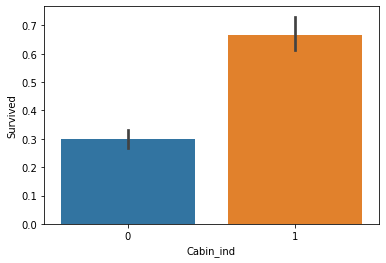

In [346]:
sns.barplot(x='Cabin_ind' , y='Survived', data = titanic )